In [2]:
using Distributions
using Random

$$
 f(x,v) = \frac{1}{\sqrt{2π}}( 1 + ϵ \cos ( k_x x)  e^{-v^2/2} 
$$

In [3]:
?Cosine

search: Cosine copysign CompositeException ContinuousDistribution



```
Cosine(μ, σ)
```

A raised Cosine distribution.

External link:

  * [Cosine distribution on wikipedia](http://en.wikipedia.org/wiki/Raised_cosine_distribution)


$$
f(x;\mu,\sigma)=\frac{1}{2\sigma}
\left[1+\cos\left(\frac{x-\mu}{\sigma}\,\pi\right)\right]\,
$$

In [4]:
?Normal

search: Normal NormalCanon NormalInverseGaussian MvNormal MvNormalCanon



```
Normal(μ,σ)
```

The *Normal distribution* with mean `μ` and standard deviation `σ≥0` has probability density function

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

Note that if `σ == 0`, then the distribution is a point mass concentrated at `μ`. Though not technically a continuous distribution, it is allowed so as to account for cases where `σ` may have underflowed, and the functions are defined by taking the pointwise limit as $σ → 0$.

```julia
Normal()          # standard Normal distribution with zero mean and unit variance
Normal(mu)        # Normal distribution with mean mu and unit variance
Normal(mu, sig)   # Normal distribution with mean mu and variance sig^2

params(d)         # Get the parameters, i.e. (mu, sig)
mean(d)           # Get the mean, i.e. mu
std(d)            # Get the standard deviation, i.e. sig
```

External links

  * [Normal distribution on Wikipedia](http://en.wikipedia.org/wiki/Normal_distribution)


In [5]:
kₓ, ϵ = 0.5, 0.1

(0.5, 0.1)

In [6]:
using Plots

┌ Info: Recompiling stale cache file /Users/navaro/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [48]:
nx, nv = 64, 128
xmin, xmax = 0, 2π
vmin, vmax = -6, 6
xg = range( 0, stop=2, length=nx+1)[1:end-1] |> collect
vg = range(-6, stop=6, length=nx+1)[1:end-1] |> collect;

In [49]:
fx = Cosine(1,1)
fv = Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

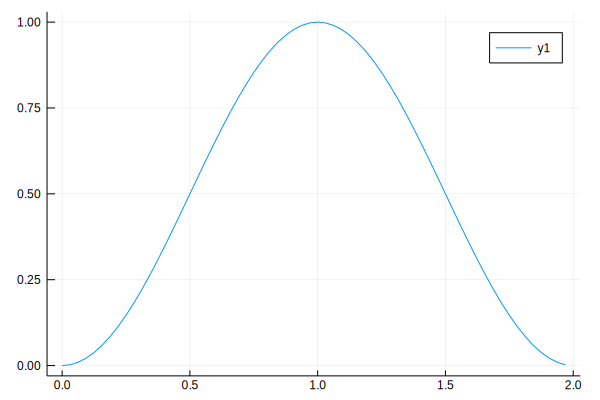

In [50]:
plot(xg, pdf.(fx, xg))

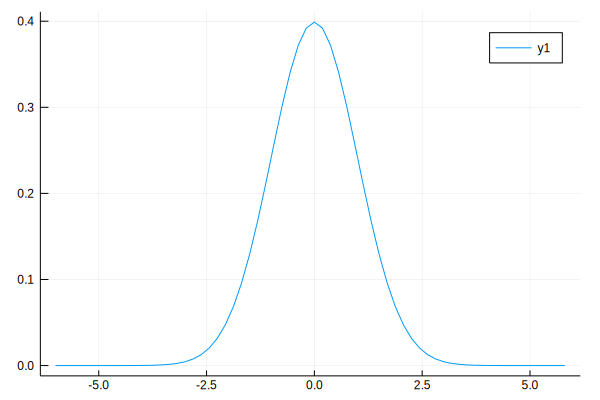

In [51]:
plot(vg, pdf.(fv, vg))

In [14]:
rand(fx)

1.6587017236984138

In [9]:
x = rand!(fx, zeros(1000))
v = rand!(fv, zeros(1000))


(-3.164285409805282, 3.725281535032332)

In [21]:
rho = zeros
df = zeros(Int64,(nx,nv))
for px in x, pv in v
    ix = floor(Int64, (px-xmin)/(xmax-xmin)*nx)+1
    iv = floor(Int64, (pv-vmin)/(vmax-vmin)*nv)+1
    df[ix,iv] += 1
end
contour(xg, vg, df)

BoundsError: BoundsError: attempt to access 64×128 Array{Int64,2} at index [24, 129]

In [16]:
fxv(x, v) = ( 1 + ϵ * cos(kₓ * x )) / sqrt(2π) * exp(- (v^2)/ 2)

fxv (generic function with 1 method)

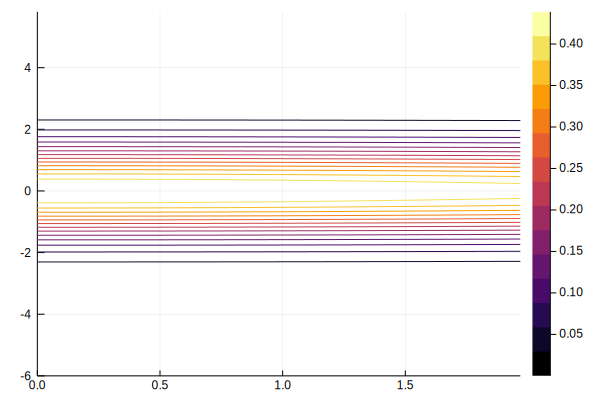

In [20]:
contour(xg, vg, fxv)